<a href="https://colab.research.google.com/github/riveramatthew/Micro-Credential/blob/main/Unit4_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
#setting up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Data important
diabetes = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv', index_col= None)
diabetes

In [ ]:
#predict whether a patient is likely to not be readmit in the hospital within 30 days. (No = readamit)
#Filter by 30 days
#Filter by readmittance/ DiabetesMed
#Race or Gender
#Age

In [ ]:
diabetes2 = diabetes.drop(['insulin','encounter_id','weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'num_lab_procedures', 'medical_specialty', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone'], axis=1)
diabetes2

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),3,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),5,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),10,Ch,Yes,NO


In [ ]:
diabetes_time = diabetes2.sort_values(by=['time_in_hospital'], ascending=True)
diabetes_time

In [ ]:
diabetes_timept2 = diabetes_time[diabetes_time.time_in_hospital == 1]
diabetes_timept2

In [ ]:
diabetes_readmitted = diabetes_timept2.sort_values(by=['readmitted'], ascending=True)
diabetes_readmitted

In [ ]:
diabetes_readmitted2 = diabetes_readmitted[diabetes_readmitted['readmitted'] == 'NO']
len(diabetes_readmitted2)

In [ ]:
diabetes_readmitted2 = diabetes_readmitted[diabetes_readmitted.readmitted == 'NO'] 
diabetes_readmitted2

,patient_nbr,race,gender,age,time_in_hospital,change,diabetesMed,readmitted
54816,112873185,Caucasian,Female,[60-70),1,Ch,Yes,NO
57946,102871845,AfricanAmerican,Female,[50-60),1,No,No,NO
28655,25602372,Caucasian,Male,[40-50),1,No,No,NO
34371,23507280,Caucasian,Male,[70-80),1,No,No,NO
52963,77720535,Caucasian,Male,[50-60),1,Ch,Yes,NO
...,...,...,...,...,...,...,...,...
37884,8461413,Caucasian,Male,[70-80),1,No,Yes,NO
37873,24890679,Caucasian,Male,[70-80),1,Ch,Yes,NO
48234,25176357,Caucasian,Male,[60-70),1,No,No,NO
48316,65292111,Caucasian,Female,[70-80),1,No,No,NO


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


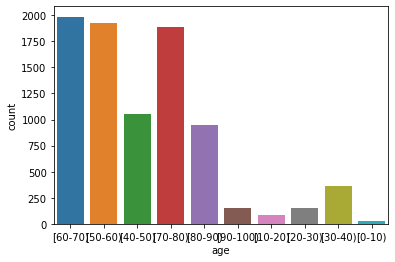

In [ ]:
sns.countplot(diabetes_readmitted2['age'], label = 'Count')

In [ ]:
diabetes_final = diabetes_readmitted2[diabetes_readmitted2.diabetesMed == 'Yes']
diabetes_final

In [ ]:
sns.countplot(diabetes_final['age'], label = 'Count') 
#People of different ages who take diabetes medication and have been in the hopsital for 1 day
#Most importantly these people have NOT returned to the hospital

In [ ]:
sns.countplot (x='race', data=diabetes_final)

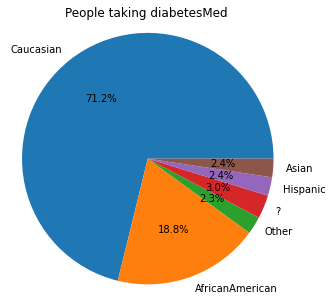

In [ ]:
plt.figure(figsize = (5,5))
Caucasian = diabetes_final[diabetes_final['race'] == "Caucasian"]
CaucasianTotal = len(Caucasian['diabetesMed'])
AfricanAmerican = diabetes_final[diabetes_final['race'] == "AfricanAmerican"]
AfricanAmericanTotal = len(AfricanAmerican['diabetesMed'])
Other = diabetes_final[diabetes_final['race'] == "Other"]
OtherTotal = len(Other['diabetesMed'])
QuestionMark = diabetes_final[diabetes_final['race'] == "?"]
QuestionMarkTotal = len(QuestionMark['diabetesMed'])
Hispanic = diabetes_final[diabetes_final['race'] == "Hispanic"]
HispanicTotal = len(Hispanic['diabetesMed'])
Asian = diabetes_final[diabetes_final['race'] == "Hispanic"]
AsianTotal = len(Asian['diabetesMed'])

my_data = [CaucasianTotal,AfricanAmericanTotal,OtherTotal,QuestionMarkTotal,HispanicTotal,AsianTotal]
my_labels = 'Caucasian','AfricanAmerican','Other','?','Hispanic','Asian'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('People taking diabetesMed')
plt.axis('equal')
plt.show()

In [ ]:
patient_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')
patient_data

In [ ]:
patient_data_df = patient_data.copy()
patient_data_clean = patient_data_df.replace('?',np.NaN)
patient_data_missing_values = patient_data_clean.isnull().sum()
patient_data_missing_values

In [ ]:
type(patient_data_clean)

In [ ]:
patient_data_ml= patient_data_clean.drop(['weight','payer_code','medical_specialty'],axis=1)
patient_data_ml.head()

In [ ]:
patient_data_ml= patient_data_clean.drop(['weight','payer_code','medical_specialty'],axis=1)
patient_data_ml.head()

In [ ]:
patient_data_ml['30DayReadmit'] = np.where(patient_data_ml['readmitted'] == 'NO', 0, 1)
patient_data_ml.head()

In [ ]:
patient_data_ml = patient_data_ml[((patient_data_ml.discharge_disposition_id != 11) & 
                                          (patient_data_ml.discharge_disposition_id != 13) &
                                          (patient_data_ml.discharge_disposition_id != 14) & 
                                          (patient_data_ml.discharge_disposition_id != 19) & 
                                          (patient_data_ml.discharge_disposition_id != 20) & 
                                          (patient_data_ml.discharge_disposition_id != 21))]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,
numcolumn = patient_data_ml.select_dtypes(include = [np.number]).columns
objcolumn = patient_data_ml.select_dtypes(include = ['object']).columns

# Substituting 0 and unknown,
patient_data_ml[numcolumn] = patient_data_ml[numcolumn].fillna(0)
patient_data_ml[objcolumn] = patient_data_ml[objcolumn].fillna("unknown")

In [ ]:
patient_data_ml.head()

In [ ]:
patient_data_ml.describe

In [ ]:
patient_data_ml = patient_data_ml.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)
patient_data_ml

In [ ]:
#Normalization of the data,
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

normal = StandardScaler()

patient_data_ml[listnormal] = normal.fit_transform(patient_data_ml[listnormal])

patient_data_ml.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30DayReadmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,1.873823e-14,-3.422902e-15,3.449070e-15,-1.790011e-15,1.182191e-13,6.322422e-14,-1.499301e-15,-9.426122e-14,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [ ]:
Y = patient_data_ml['30DayReadmit']
X = patient_data_ml.drop(['30DayReadmit'], axis =1)
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [ ]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 2363) (19869, 2363)


In [ ]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [ ]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6293723891489255


In [ ]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8400 2106]
 [5258 4105]]


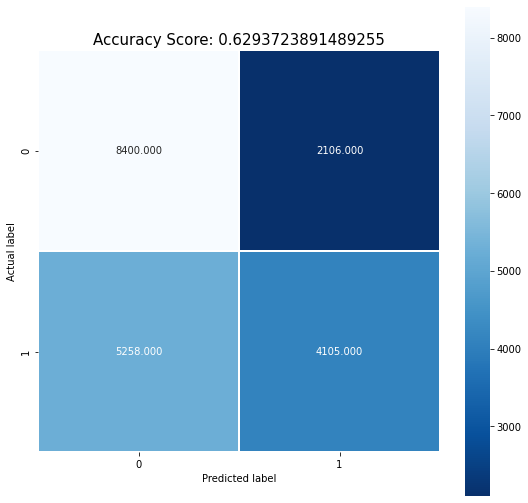

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [ ]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.62      0.80      0.70     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.64      0.63      0.62     19869



In [ ]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

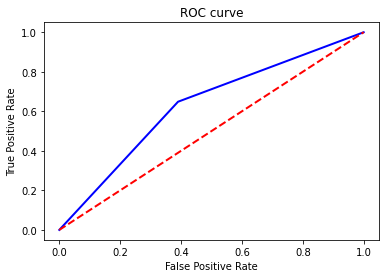

In [ ]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


In [ ]:
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dot_dt_q2 = tree.export_graphviz(clfgini, out_file="dt_q2.dot", feature_names=Xtrain.columns, max_depth=3, class_names=["1","0"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')

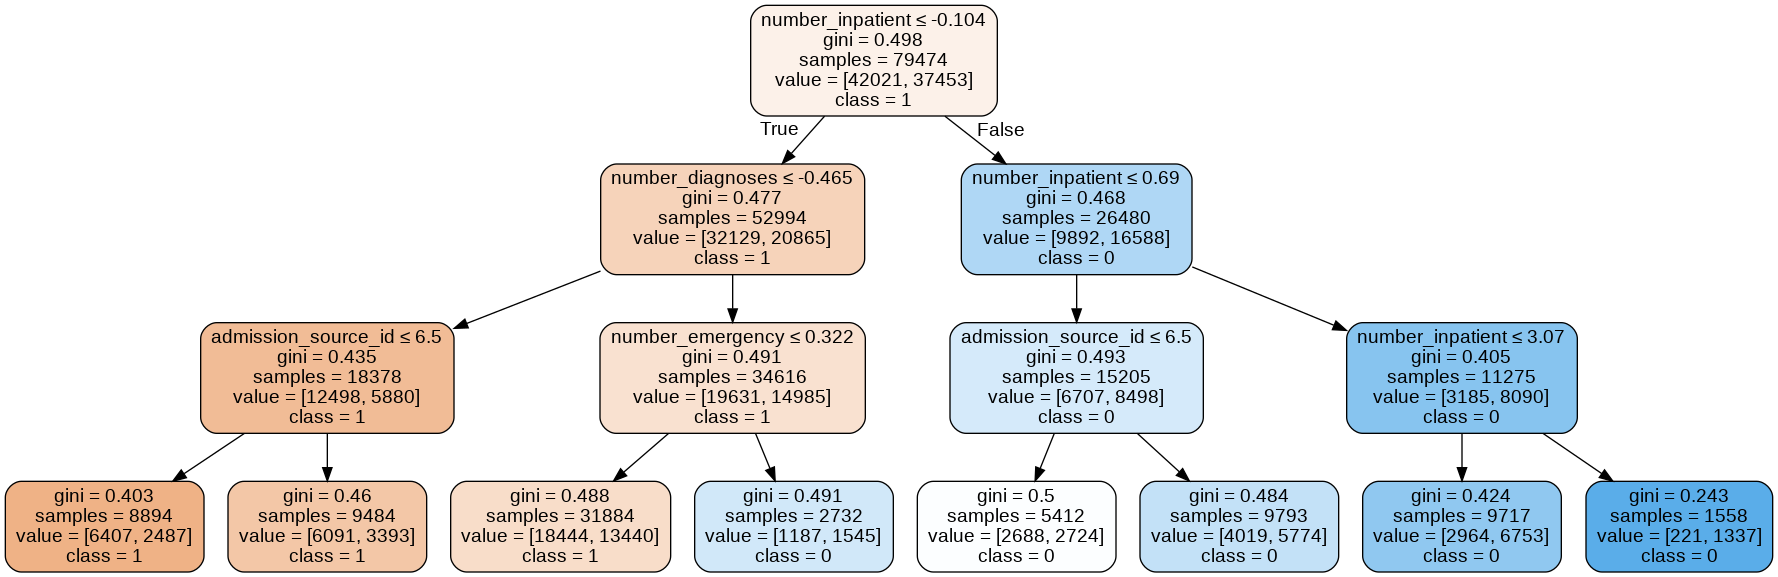

In [ ]:
Image(graph_dt_q2.create_png())

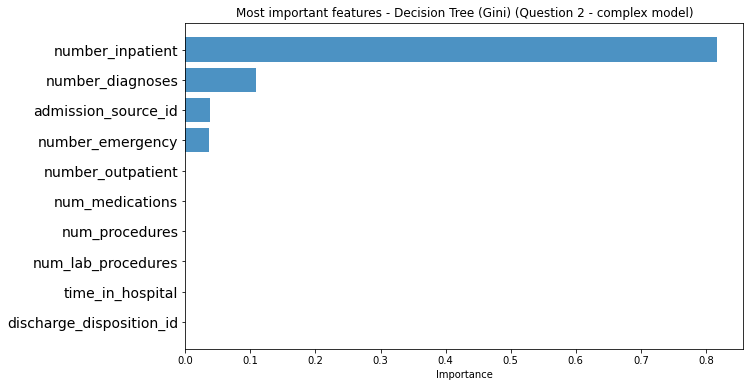

In [ ]:
# Shot top most features based on importance
feature_names = Xtrain.columns
feature_imports = clfgini.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (Gini) (Question 2 - complex model)')
plt.show()

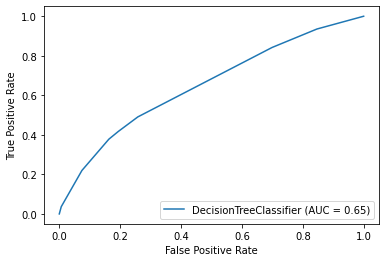

In [ ]:
metrics.plot_roc_curve(clfgini, Xtest, Ytest)